# 1 - Perkenalan

Nama: Tandya Anggergian

Batch: FTDS-10

Dataset: diabetes_binary_health_indicators_BRFSS2015

Dataset ini berisi data dari The Behavioral Risk Factor Surveillance System (BRFSS), sebuah survey telepon yang dilakukan pertahun oleh CDC.

Tiap tahun, survey ini dilakukan pada lebih dari 400.000 warga Amerika Serikat dengan mengambil data tentang resiko perilaku yang berhubungan dengan kesehatan, kondisi jantung kronis, dan penggunaan layanan yang digunakan untuk mencegah diabetes.

Dataset ini mengambil sample sejumlah 253.680 dengan fitur sebanyak 21. 

# 2 - Import Libraries

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as rocauc
import pickle

# 3 - Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
#Duplicate Dataset

data_copy = data.copy()

In [4]:
#Check Daistribution

data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# 4 - Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

---
## Dimensi Dataset

In [5]:
data.shape

(253680, 22)

Terdapat 22 kolom dan 253680 baris pada dataset ini.

---
## Preview Dataset

In [6]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


---
## Cek Data Type pada Tiap Kolom

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Cek jumlah kolom numerical.

In [8]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('Ada {} kolom numerical. \n'.format(len(numerical)))

print('Kolom numerical tersebut adalah:', numerical)

Ada 22 kolom numerical. 

Kolom numerical tersebut adalah: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [9]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('Ada {} kolom numerical. \n'.format(len(categorical)))

print('Kolom numerical tersebut adalah:', categorical)

Ada 0 kolom numerical. 

Kolom numerical tersebut adalah: []


Dari 22 kolom, terdapat 22 kolom numerical dan 0 kolom categorical.

---
## Cek Persentase Missing Value

In [10]:
data.isnull().sum() / data.shape[0] * 100

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

Tidak ditemukan missing value pada dataset.

---
## Cek Sebaran Data Numerical

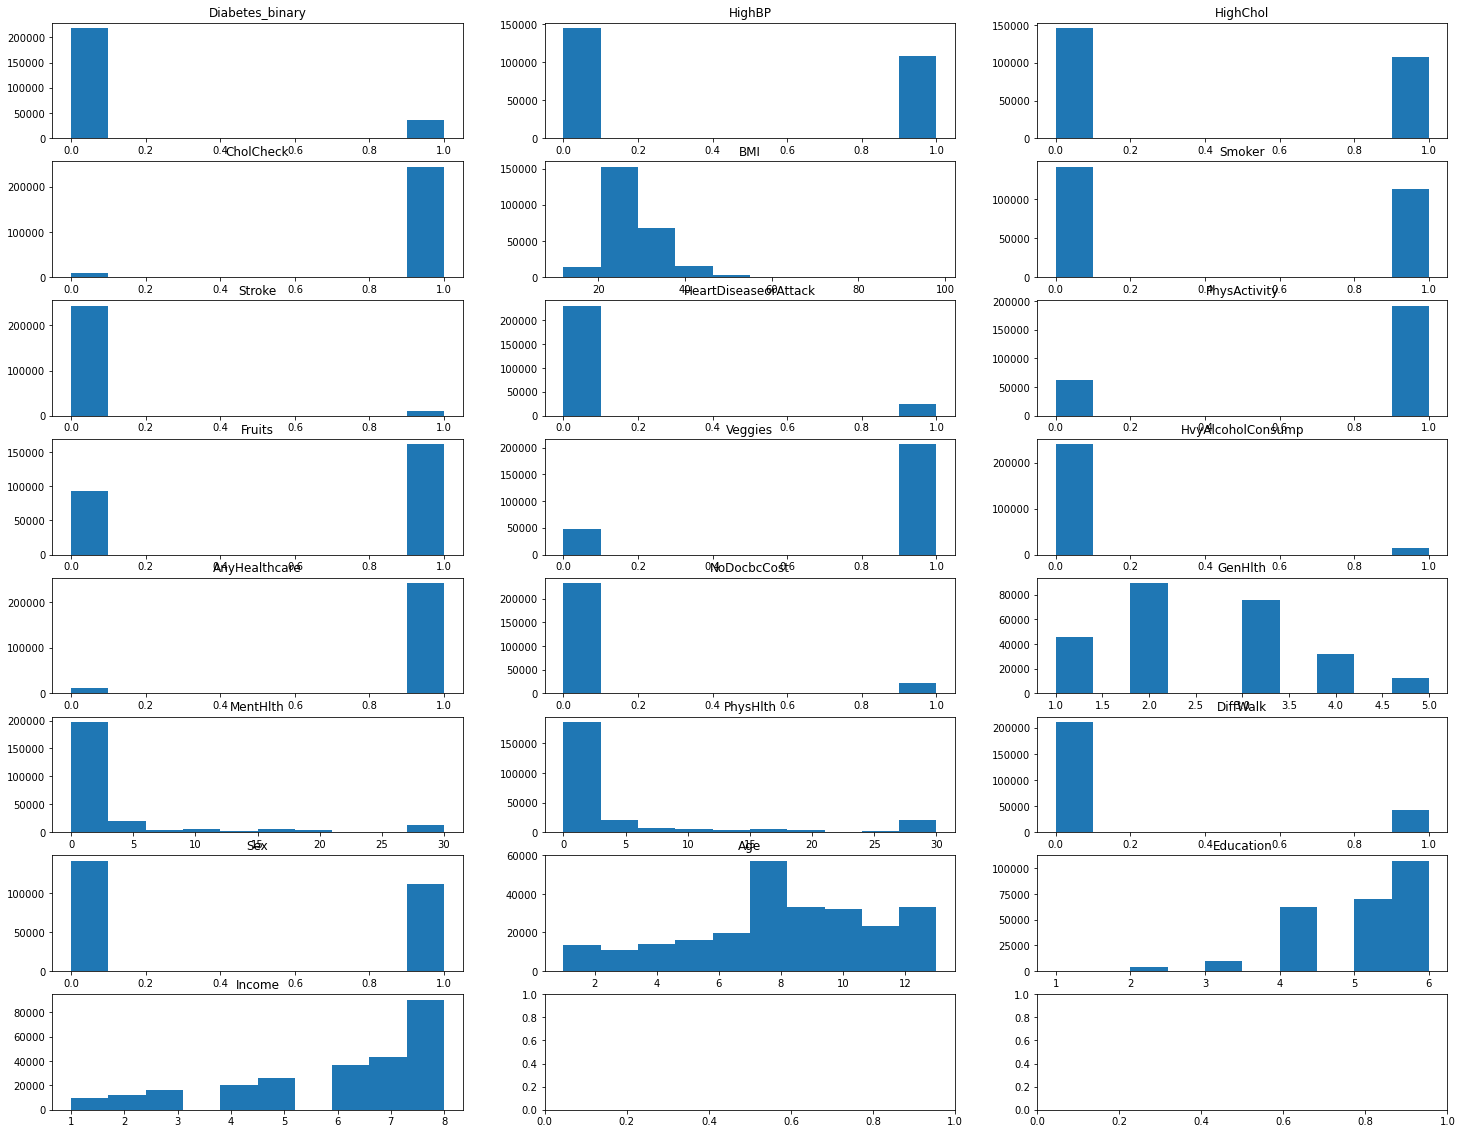

In [11]:
fig, axs = plt.subplots(8, 3, sharex=False, sharey=False, figsize=(25, 20))

counter = 0
for num_column in numerical:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

Terlihat beberapa kolom akan memiliki tingkat outlier yang cukup tinggi yaitu kolom 'MentHlth', 'Education', dan 'Income'.

Terdapat keanehan pada kolom 'age' karena umurnya hanya sampai 13 saja. Ternyata 'age' disini memiliki rentang umur 5 tahun di mana angka 1 dimulai dari umur 18-24, hingga 13 yang mengindikasikan umur 80 tahun ke atas.

Kolom 'Education' juga berupa ordinal dengan skala 1-6 di mana 1 berarti tidak pernah sekolah, 2 menyelesaikan TK, 3 menyelesaikan SD, 4 menyelsaikan SMP, 5 menyelesaikan SMA, dan 6 menyelesaikan pendidikan tinggi.

Kolom 'GenHlth' merupakan kolom indikasi kesehatan secara umum di mana 1 sang responden merasa sangat baik dan 5 sangat buruk.

Kolom 'MentHlth' merupakan kolom jumlah hari dalam 30 hari terakhir sang responden merasakan adanya indikasi stress, depresi, dan masalah kesehatan mental lainnya.

Kolom 'PhysHlth' merupakan kolom jumlah hari dalam 30 hari terakhir sang responden merasakan adanya indikasi kecapaian atau merasa tidak sehat secara jasmani (seperti sempat jatuh atau adanya kecelakaan).

Kolom 'Income' ternyata juga sudah merupakan kolom ordinal di mana nilai 1 berada pada rentang < $10.000 dan nilai 8 berada pada rentang > $75.000 pertahunnya.

Selanjutnya, kita lakukan perhitungan untuk mencari skewness pada tiap-tiap kolom numerical.

In [12]:
for column in numerical:
    print(f'\'{data[column].name}\' skewness: {data[column].skew()}')
    if data[column].skew() > 0.5:
        print('right skewed')
    elif data[column].skew() < -0.5:
        print('left skewed')
    else:
        print('normal distribution')

'Diabetes_binary' skewness: 2.0830243952970133
right skewed
'HighBP' skewness: 0.28690447465471414
normal distribution
'HighChol' skewness: 0.30707467860678667
normal distribution
'CholCheck' skewness: -4.881271419049933
left skewed
'BMI' skewness: 2.122003758291108
right skewed
'Smoker' skewness: 0.22880994026346627
normal distribution
'Stroke' skewness: 4.657339734800821
right skewed
'HeartDiseaseorAttack' skewness: 2.778741772122561
right skewed
'PhysActivity' skewness: -1.195546154195298
left skewed
'Fruits' skewness: -0.5574995446062533
left skewed
'Veggies' skewness: -1.592238659454497
left skewed
'HvyAlcoholConsump' skewness: 3.8541317262801797
right skewed
'AnyHealthcare' skewness: -4.181115755751794
left skewed
'NoDocbcCost' skewness: 2.9952898938402455
right skewed
'GenHlth' skewness: 0.42286687511201615
normal distribution
'MentHlth' skewness: 2.721148365662696
right skewed
'PhysHlth' skewness: 2.2073949151986723
right skewed
'DiffWalk' skewness: 1.773907431995794
right skew

Dari hasil pengecekan tingkat skewness, terlihat bahwa kolom yang terdistribusi secara normal adalah 'HighBP', 'HighCol', 'Smoker', 'GenHlth', 'Sex', dan 'Age'.

---
## Cek Properti Statistical Dataset

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Dari properti statistical tersebut dapat terlihat beberapa informasi penting seperti:

### Anomali pada kolom 'BMI'

BMI merupakan indeks massa tubuh yang merupakan indikasi apakah seseorang memiliki tubuh yang ideal, terlalu gemuk atau terlalu kurus. BMI sendiri memiliki rentang klasifikasi < 18,5 untuk terlalu kurus (underweight) hingga >= 30 untuk obesitas.

In [14]:
data['BMI'].value_counts()

27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64

Selanjutnya kita cek persentasenya.

In [15]:
data['BMI'].value_counts() / len(data)

27.0    0.096996
26.0    0.081055
24.0    0.077066
25.0    0.067589
28.0    0.065220
          ...   
85.0    0.000004
91.0    0.000004
86.0    0.000004
90.0    0.000004
78.0    0.000004
Name: BMI, Length: 84, dtype: float64

Pada properti statistik tersebut nilai maksimal adalah 98 di mana angka tersebut sangat tinggi dan dinilai sangat tidak mungkin sehingga kemungkinan nilai tersebut adalah outlier.

### Anomali Pada Kolom 'MentHlth'

Seperti yang sudah disebutkan sebelumnya, kolom 'MentHlth' merupakan kolom yang berisi data jumlah hari responden merasakan adanya indikasi gejala kesehatan mental dalam 30 hari terakhir.

Pada properti statistik terlihat nilai tertingginya adalah 30 yang menunjukkan bahwa responden tersebut sedang mengalami masalah kesehatan mental setiap hari dalam 30 hari terakhir.

Untuk melihat seberapa banyak, kita bisa lihat unique value dan presentasenya.

In [16]:
data['MentHlth'].value_counts()

0.0     175680
2.0      13054
30.0     12088
5.0       9030
1.0       8538
3.0       7381
10.0      6373
15.0      5505
4.0       3789
20.0      3364
7.0       3100
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: MentHlth, dtype: int64

Selanjutnya kita cek persentasenya.

In [17]:
data['MentHlth'].value_counts() / len(data)

0.0     0.692526
2.0     0.051459
30.0    0.047651
5.0     0.035596
1.0     0.033657
3.0     0.029096
10.0    0.025122
15.0    0.021701
4.0     0.014936
20.0    0.013261
7.0     0.012220
25.0    0.004683
14.0    0.004600
6.0     0.003895
8.0     0.002519
12.0    0.001569
28.0    0.001289
21.0    0.000895
29.0    0.000623
18.0    0.000382
9.0     0.000359
16.0    0.000347
27.0    0.000311
22.0    0.000248
17.0    0.000213
26.0    0.000177
11.0    0.000162
13.0    0.000162
23.0    0.000150
24.0    0.000130
19.0    0.000063
Name: MentHlth, dtype: float64

Ternyata persentase jumlah hari 30 cukup tinggi sehingga bisa diasumsikan akan ada outlier pada kolom ini.

### Anomali Pada Kolom 'PhysHlth'

Seperti yang sudah disebutkan sebelumnya, kolom 'PhysHlth' merupakan kolom yang berisi data jumlah hari responden merasakan adanya indikasi gejala kesehatan fisik dalam 30 hari terakhir.

Pada properti statistik terlihat nilai tertingginya adalah 30 yang menunjukkan bahwa responden tersebut sedang mengalami masalah kesehatan fisik setiap hari dalam 30 hari terakhir.

Untuk melihat seberapa banyak, kita bisa lihat unique value dan presentasenya.

In [18]:
data['PhysHlth'].value_counts()

0.0     160052
30.0     19400
2.0      14764
1.0      11388
3.0       8495
5.0       7622
10.0      5595
15.0      4916
4.0       4542
7.0       4538
20.0      3273
14.0      2587
25.0      1336
6.0       1330
8.0        809
21.0       663
12.0       578
28.0       522
29.0       215
9.0        179
18.0       152
16.0       112
27.0        99
17.0        96
24.0        72
22.0        70
26.0        69
13.0        68
11.0        60
23.0        56
19.0        22
Name: PhysHlth, dtype: int64

Selanjutnya kita cek persentasenya.

In [19]:
data['PhysHlth'].value_counts() / len(data)

0.0     0.630921
30.0    0.076474
2.0     0.058199
1.0     0.044891
3.0     0.033487
5.0     0.030046
10.0    0.022055
15.0    0.019379
4.0     0.017904
7.0     0.017889
20.0    0.012902
14.0    0.010198
25.0    0.005266
6.0     0.005243
8.0     0.003189
21.0    0.002614
12.0    0.002278
28.0    0.002058
29.0    0.000848
9.0     0.000706
18.0    0.000599
16.0    0.000442
27.0    0.000390
17.0    0.000378
24.0    0.000284
22.0    0.000276
26.0    0.000272
13.0    0.000268
11.0    0.000237
23.0    0.000221
19.0    0.000087
Name: PhysHlth, dtype: float64

Ternyata persentase jumlah hari 30 cukup tinggi sehingga bisa diasumsikan akan ada outlier pada kolom ini.

Jadi, kesimpulannya adalah:

- Terdapat anomali pada nilai BMI yaitu nilai extreme yang mencapai 70 ke atas. Nilai tersebut diasumsikan mustahil untuk terjadi sehingga muncul kemungkinan adanya outlier.
- Kolom 'MentHlth' dan 'PhysHlth' memiliki data responden yang merasakan masalah baik mental maupun fisik sepanjang hari dalam 30 hari terakhir.

---
## Analisa Kolom Target

Pada dataset ini, kolom target adalah 'Diabetes_binary'. Kolom ini berisi tentang apakah responden memiliki diabetes atau tidak. Nilai 0 menunjukkan bahwa responden tidak memiliki diabetes sedangkan angka 1 menunjukkan bahwa responden memiliki diabetes.

Gunakan barplot untuk mengetahui seberapa banyak responden yang memiliki penyakit diabetes dan yang tidak memiliki penyakit diabetes.

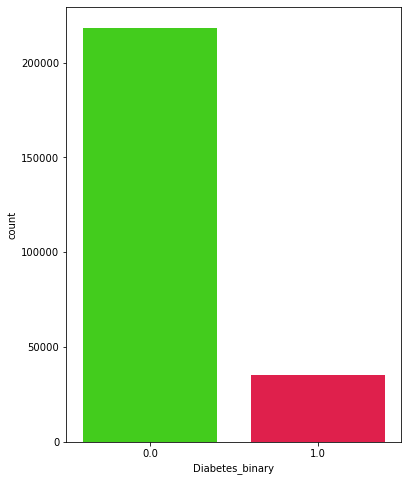

In [20]:
f, ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='Diabetes_binary', data=data, palette='prism')
plt.show()

Dapat terlihat bahwa responden yang tidak memiliki diabetes jauh lebih besar daripada responden yang diabetes.

Akan tetapi, data tersebut imbalance. Mari kita lihat degree of imbalance dari target.

In [21]:
data['Diabetes_binary'].value_counts() / len(data)

0.0    0.860667
1.0    0.139333
Name: Diabetes_binary, dtype: float64

Proporsi dari nilai minoritas pada kolom target adalah 13,9%. Nilai tersebut bisa dikategorikan sebagai Moderately imbalance.

Nantinya hal ini akan dihandling pada data preprocessing.

---
### Proporsi Penderita Diabetes dan Non-Diabetes pada Gender

C:\Users\Tandya\AppData\Local\Temp/ipykernel_19032/3654261146.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_diabet = male[data["Diabetes_binary"]==1]
C:\Users\Tandya\AppData\Local\Temp/ipykernel_19032/3654261146.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_not = male[data["Diabetes_binary"]==0]
C:\Users\Tandya\AppData\Local\Temp/ipykernel_19032/3654261146.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_diabet = female[data["Diabetes_binary"]==1]
C:\Users\Tandya\AppData\Local\Temp/ipykernel_19032/3654261146.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_not = female[data["Diabetes_binary"]==0]


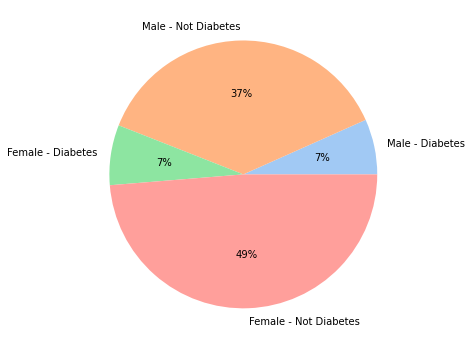

In [22]:
male = data[data["Sex"]==1]
female = data[data["Sex"]==0]

male_diabet = male[data["Diabetes_binary"]==1]
male_not = male[data["Diabetes_binary"]==0]
female_diabet = female[data["Diabetes_binary"]==1]
female_not = female[data["Diabetes_binary"]==0]

data_diabet = [len(male_diabet), len(male_not), len(female_diabet), len(female_not)]
labels = ['Male - Diabetes', 'Male - Not Diabetes', 'Female - Diabetes', 'Female - Not Diabetes']

palette_color = sns.color_palette('pastel')
f, ax = plt.subplots(figsize=(6, 8))
ax = plt.pie(data_diabet, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

Dari plot di atas dapat terlihat bahwa:

- Male - Diabetes = 7%
- Male - Not Diabetes = 37%
- Female - Diabetes = 7%
- Female - Not Diabetes = 49%

---
### Analisa kolom 'Age' terhadap 'Diabetes_binary'

<AxesSubplot:title={'center':'Age dan Diabetes_binary'}>

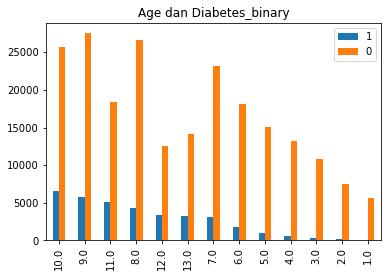

In [23]:
age_target_data = pd.DataFrame()
age_target_data[1] = data[data['Diabetes_binary']==1]['Age'].value_counts()
age_target_data[0] = data[data['Diabetes_binary']==0]['Age'].value_counts()

age_target_data.plot.bar(title = 'Age dan Diabetes_binary')

Terlihat dari plot tersebut bahwa rentang umur dengan jumlah penderita diabetes tertinggi berada di rentang umur 10 (59 - 65 tahun).

Sebaliknya, rentang umur dengan jumlah responden yang tidak diabetes tertinggi berada di rentang umur 9 (52 - 58 tahun).

---
### Analisa kolom 'PhysActivity' terhadap 'Diabetes_binary'

<AxesSubplot:title={'center':'PhysActivity dan Diabetes_binary'}>

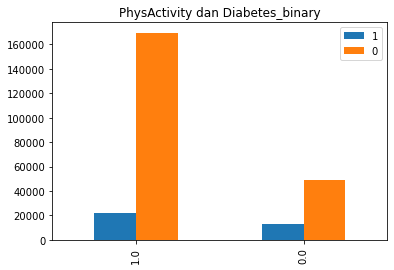

In [24]:
pa_target_data = pd.DataFrame()
pa_target_data[1] = data[data['Diabetes_binary']==1]['PhysActivity'].value_counts()
pa_target_data[0] = data[data['Diabetes_binary']==0]['PhysActivity'].value_counts()

pa_target_data.plot.bar(title = 'PhysActivity dan Diabetes_binary')

Nilai 1 pada sumbu x menunjukkan bahwa responden melakukan aktivitas fisik dalam 30 hari terakhir, sedangkan nilai 0 menunjukkan bahwa responden tidak melakukan aktivitas fisik dalam 30 hari terakhir.

Dapat terlihat dari plot di atas bahwa responden yang melakukan aktivitas fisik dalam 30 hari terakhir tidak memiliki tendensi diabetes dibandingkan dengan responden yang tidak melakukan aktivitas fisik.

Namun, jumlah penderita diabetes bagi responden yang melakukan aktivitas fisik juga lebih tinggi daripada responden yang tidak melakukan aktivitas fisik.

---
### Analisa kolom 'Fruits' terhadap 'Diabetes_binary'

<AxesSubplot:title={'center':'Fruits dan Diabetes_binary'}>

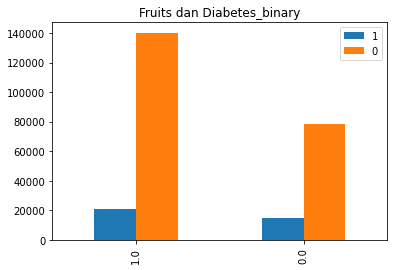

In [25]:
frts_target_data = pd.DataFrame()
frts_target_data[1] = data[data['Diabetes_binary']==1]['Fruits'].value_counts()
frts_target_data[0] = data[data['Diabetes_binary']==0]['Fruits'].value_counts()

frts_target_data.plot.bar(title = 'Fruits dan Diabetes_binary')

Nilai 1 pada sumbu x menunjukkan bahwa responden mengkonsumsi buah dalam 30 hari terakhir, sedangkan nilai 0 menunjukkan bahwa responden tidak mengkonsumsi buah dalam 30 hari terakhir.

Dapat terlihat dari plot di atas bahwa responden yang melakukan mengkonsumsi buah dalam 30 hari terakhir tidak memiliki tendensi diabetes dibandingkan dengan responden yang tidak mengkonsumsi buah.

Namun, jumlah penderita diabetes bagi responden yang mengkonsumsi buah juga lebih tinggi daripada responden yang tidak mengkonsumsi buah-buahan.

---
### Analisa kolom 'Veggies' terhadap 'Diabetes_binary'

<AxesSubplot:title={'center':'Veggies dan Diabetes_binary'}>

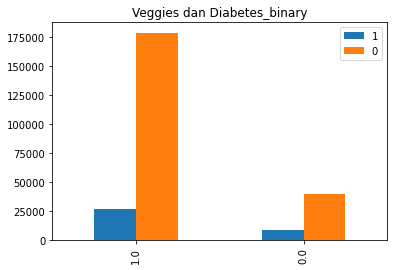

In [26]:
vgs_target_data = pd.DataFrame()
vgs_target_data[1] = data[data['Diabetes_binary']==1]['Veggies'].value_counts()
vgs_target_data[0] = data[data['Diabetes_binary']==0]['Veggies'].value_counts()

vgs_target_data.plot.bar(title = 'Veggies dan Diabetes_binary')

Nilai 1 pada sumbu x menunjukkan bahwa responden mengkonsumsi sayur dalam 30 hari terakhir, sedangkan nilai 0 menunjukkan bahwa responden tidak mengkonsumsi sayur dalam 30 hari terakhir.

Dapat terlihat dari plot di atas bahwa responden yang melakukan mengkonsumsi sayur dalam 30 hari terakhir tidak memiliki tendensi diabetes dibandingkan dengan responden yang tidak mengkonsumsi sayur.

Namun, jumlah penderita diabetes bagi responden yang mengkonsumsi sayur juga lebih tinggi daripada responden yang tidak mengkonsumsi sayur-sayuran.

---
### Analisa kolom 'HvyAlcoholConsump' terhadap 'Diabetes_binary'

<AxesSubplot:title={'center':'HvyAlcoholConsump dan Diabetes_binary'}>

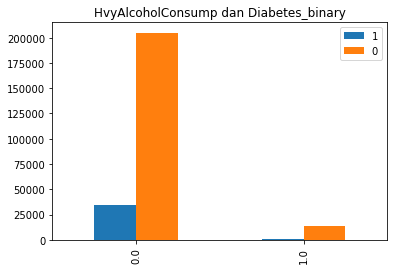

In [27]:
hac_target_data = pd.DataFrame()
hac_target_data[1] = data[data['Diabetes_binary']==1]['HvyAlcoholConsump'].value_counts()
hac_target_data[0] = data[data['Diabetes_binary']==0]['HvyAlcoholConsump'].value_counts()

hac_target_data.plot.bar(title = 'HvyAlcoholConsump dan Diabetes_binary')

Nilai 1 pada sumbu x menunjukkan bahwa responden mengkonsumsi merupakan peminum berat, sedangkan nilai 0 menunjukkan bahwa responden bukan merupakan peminum berat.

Dapat dilihat dari plot bahwa responden yang bukan merupakan peminum berat banyak yang tidak terkena diabetesdibandingkan yang merupakan peminum berat.

Jadi, dapat disimpulkan bahwa:

- Kolom target imbalance dengan tingkatan moderate.
- Rentang umur penderita diabetes tertinggi ada pada rentang umur 10 (59-65 tahun)
- Klien yang melakukan aktivitas fisik, makan buah-buahan dan sayur-mayur memiliki tendensi untuk tidak mengalami diabetes dibandingkan dengan yang tidak melakukan aktivitas tersebut.
- Konsumsi alkohol memiliki pengeruh apakah responden mengidap diabetes atau tidak.

# 5 - Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

Buat copy untuk melakukan data cleaning.

In [28]:
data_clean = data.copy()
data_clean

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


---
## Data Inference

Hal pertama yang harus dilakukan adalah mendapatkan data inference.

In [29]:
data_inf = data_clean.sample(10, random_state=17)
data_inf

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
81110,0.0,1.0,1.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,5.0,5.0,7.0
199303,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,4.0,6.0
217732,0.0,1.0,1.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,30.0,1.0,0.0,10.0,6.0,5.0
123241,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,5.0,4.0,6.0
114291,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,30.0,0.0,0.0,0.0,9.0,6.0,8.0
31012,0.0,0.0,1.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,6.0,8.0
32371,1.0,1.0,0.0,1.0,33.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,5.0,8.0
75871,0.0,0.0,1.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,14.0,30.0,1.0,1.0,10.0,4.0,8.0
80573,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,15.0,0.0,0.0,0.0,7.0,4.0,7.0
237226,0.0,1.0,1.0,1.0,23.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,2.0,7.0,1.0,1.0,8.0,5.0,2.0


Selanjutnya, pisahkan data inference-set dari dataset.

In [30]:
data_train_test = data_clean.drop(data_inf.index)
data_train_test

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Lakukan reset index agar nilai index kembali terurut.

In [31]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,5.0,5.0,7.0
1,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,4.0,6.0
2,0.0,1.0,1.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,30.0,1.0,0.0,10.0,6.0,5.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,5.0,4.0,6.0
4,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,30.0,0.0,0.0,0.0,9.0,6.0,8.0
5,0.0,0.0,1.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,6.0,8.0
6,1.0,1.0,0.0,1.0,33.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,5.0,8.0
7,0.0,0.0,1.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,14.0,30.0,1.0,1.0,10.0,4.0,8.0
8,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,15.0,0.0,0.0,0.0,7.0,4.0,7.0
9,0.0,1.0,1.0,1.0,23.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,2.0,7.0,1.0,1.0,8.0,5.0,2.0


Selanjutnya lakukan splitting dataset.

---
## Splitting Dataset

Pertama kita pisahkan kolom target dari kolom dataset.

In [32]:
X = data_train_test.drop('Diabetes_binary', axis=1)
y = data_train_test['Diabetes_binary']
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253665,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253666,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253667,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253668,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Kita pisahkan untuk mendapatkan nilai X_train, X_test, y_train, dan y_test.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=17)

print('Train Size: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('Test Size: ', X_test.shape)
print('y_test shape: ', y_test.shape)

Train Size:  (202936, 21)
y_train shape:  (202936,)
Test Size:  (50734, 21)
y_test shape:  (50734,)


Kita cek nilai y untuk melihat apakah random split memiliki rasio yang sama.

In [34]:
y_train.value_counts() / len(y_train)

0.0    0.860665
1.0    0.139335
Name: Diabetes_binary, dtype: float64

Terlihat rasio nilai y pada data split sudah sama dengan rasio sebelum di-split.

---
## Handling Outlier

Mencari outlier pada datatype numerical di X_train

In [35]:
numerical = [var for var in X_train.columns if X_train[var].dtype!='O']

print('Ada {} kolom numerical. \n'.format(len(numerical)))

print('Kolom numerical tersebut adalah:', numerical)

Ada 21 kolom numerical. 

Kolom numerical tersebut adalah: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [36]:
X_train[numerical].head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
196912,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
73266,1.0,1.0,1.0,35.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,5.0
63183,1.0,1.0,1.0,32.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,30.0,1.0,0.0,10.0,5.0,4.0
91927,0.0,0.0,1.0,24.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,5.0
317,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,1.0,13.0,5.0,4.0


Dapat disimpulkan bahwa:

- Terdapat 21 kolom numerical pad X_train.
- Kolom terssebut adalah: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Selanjutnya kita cek properti statistik pada kolom tersebut.

In [37]:
X_train[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,202936.0,0.428835,0.494911,0.0,0.0,0.0,1.0,1.0
HighChol,202936.0,0.424671,0.494294,0.0,0.0,0.0,1.0,1.0
CholCheck,202936.0,0.962624,0.189683,0.0,1.0,1.0,1.0,1.0
BMI,202936.0,28.390823,6.612921,12.0,24.0,27.0,31.0,98.0
Smoker,202936.0,0.442898,0.496730,0.0,0.0,0.0,1.0,1.0
Stroke,202936.0,0.040668,0.197520,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,202936.0,0.095129,0.293393,0.0,0.0,0.0,0.0,1.0
PhysActivity,202936.0,0.756923,0.428942,0.0,1.0,1.0,1.0,1.0
Fruits,202936.0,0.634629,0.481535,0.0,0.0,1.0,1.0,1.0
Veggies,202936.0,0.811482,0.391126,0.0,1.0,1.0,1.0,1.0


Kita lakukan plot untuk melakukan pengecekan terhadap outlier.

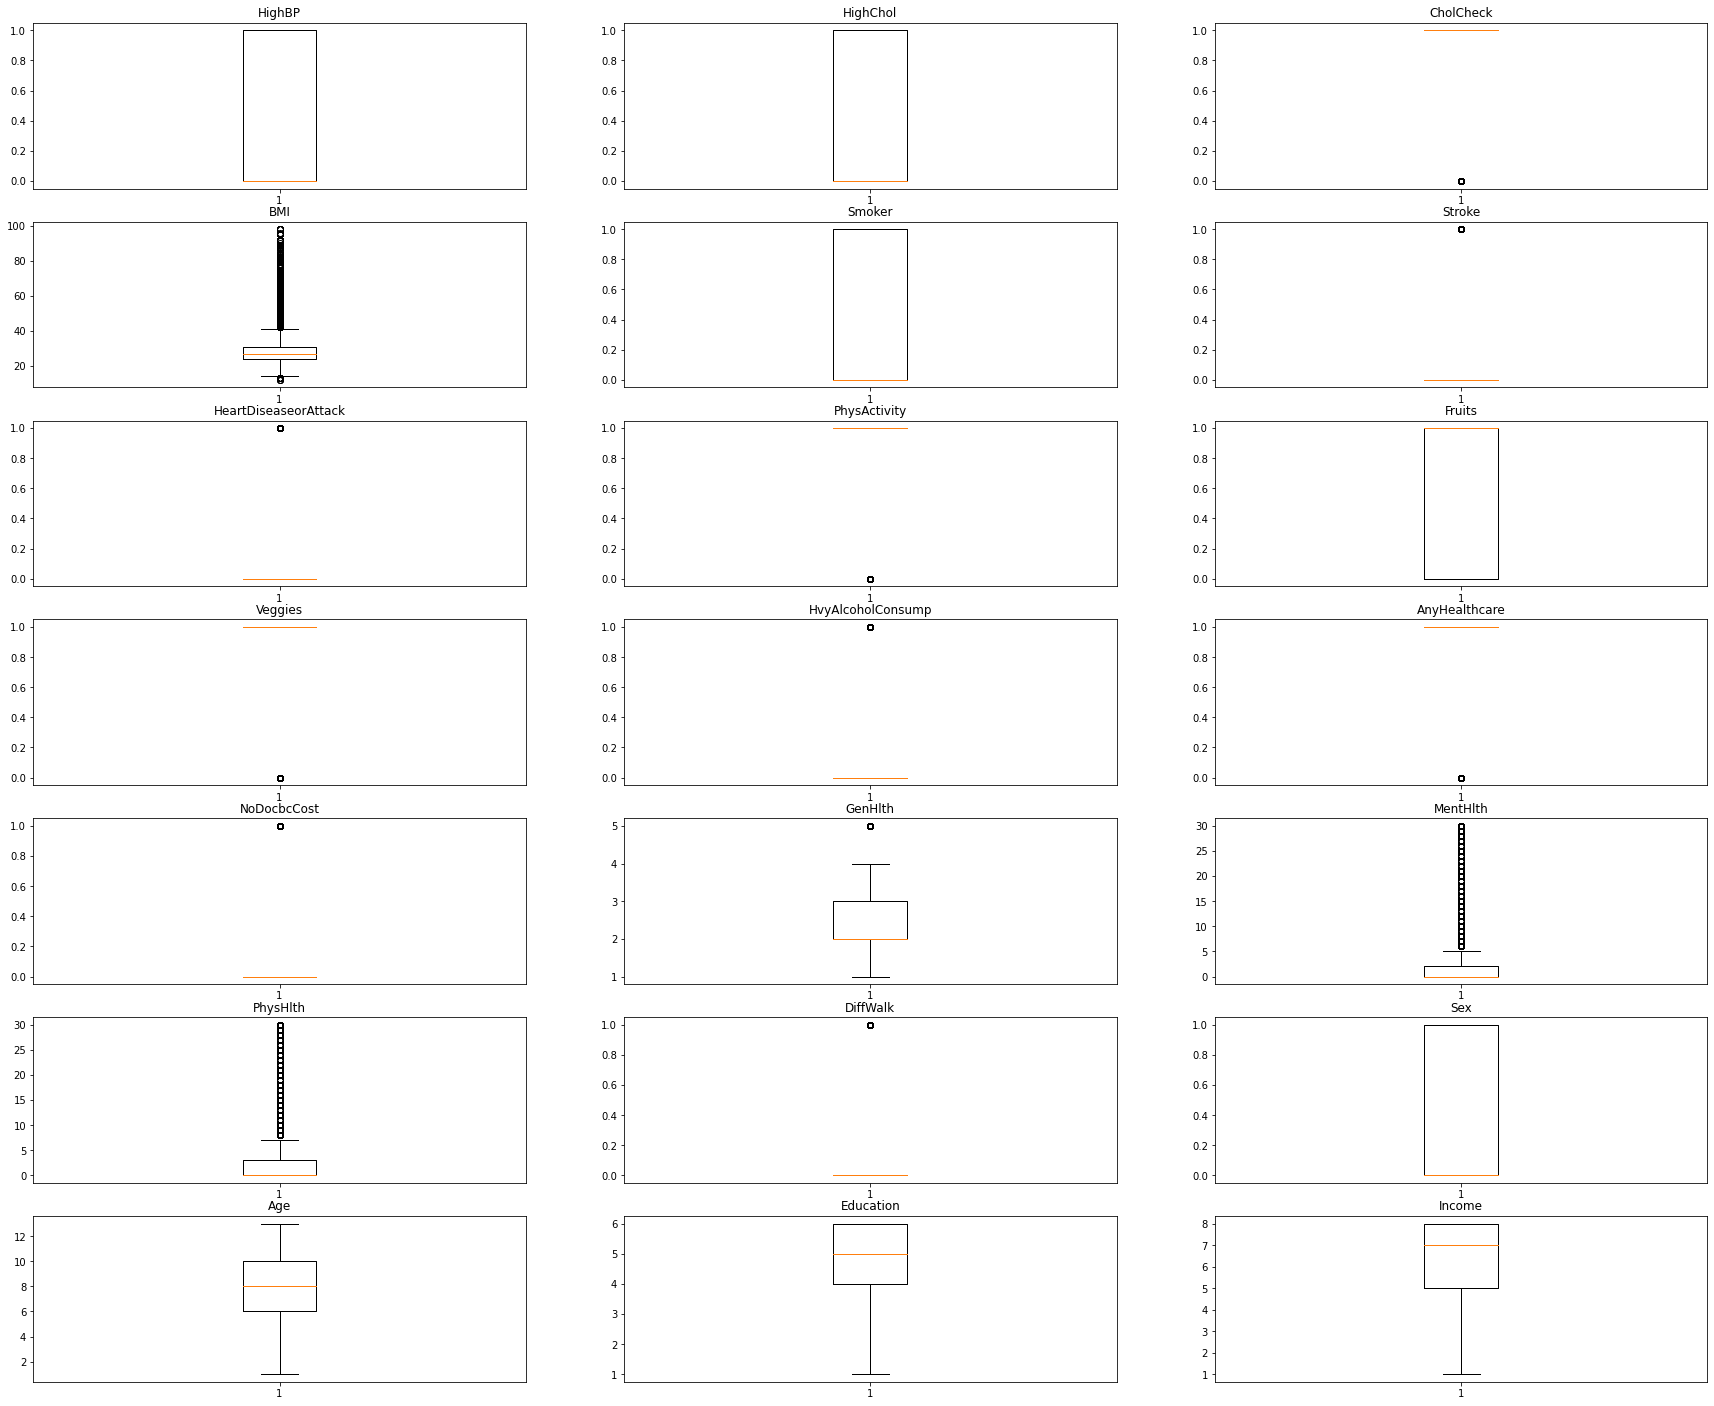

In [38]:
fig, axs = plt.subplots(7, 3, sharex=False, sharey=False, figsize=(30, 25))

counter = 0
for num_column in numerical:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].boxplot(X_train[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

Dapat terlihat ada beberapa outlier pada data numerical. Selanjutnya lakukan pengecekan persentase jumlah outlier.

In [39]:
def check_outlier(data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= 0.5:
        upper_boundary = data[column].mean() + 3*data[column].std()
        lower_boundary = data[column].mean() - 3*data[column].std()
        print('[Normal')
        print(f'Upper boundary dari {column} = {upper_boundary}')
        print(f'Lower boundary dari {column} = {upper_boundary}')
        print('Total data di atas upper boundary : {}'.format(len(data[data[column] > upper_boundary])))
        print('Total data di bawah upper boundary : {}'.format(len(data[data[column] < lower_boundary])))
        print('Persentase data di atas upper boundary : {}'.format(len(data[data[column] > upper_boundary]) / len(data) * 100))
        print('Persentase data di bawah upper boundary : {}'.format(len(data[data[column] < lower_boundary]) / len(data) * 100))
        print('-' * 100)

    else:
        IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
        upper_boundary = data[column].quantile(0.75) + (IQR * 1.5)
        lower_boundary = data[column].quantile(0.25) - (IQR * 1.5)
        print('[Skewed]')
        print(f'Upper boundary dari {column} = {upper_boundary}')
        print(f'Lower boundary dari {column} = {upper_boundary}')
        print('Total data di atas upper boundary : {}'.format(len(data[data[column] > upper_boundary])))
        print('Total data di bawah upper boundary : {}'.format(len(data[data[column] < lower_boundary])))
        print('Persentase data di atas upper boundary : {}'.format(len(data[data[column] > upper_boundary]) / len(data) * 100))
        print('Persentase data di bawah upper boundary : {}'.format(len(data[data[column] < lower_boundary]) / len(data) * 100))
        print('-' * 100)

In [40]:
feature_check = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

In [41]:
for feature in feature_check:
    check_outlier(X_train, feature)

[Skewed]
Upper boundary dari HighBP = 2.5
Lower boundary dari HighBP = 2.5
Total data di atas upper boundary : 0
Total data di bawah upper boundary : 0
Persentase data di atas upper boundary : 0.0
Persentase data di bawah upper boundary : 0.0
----------------------------------------------------------------------------------------------------
[Skewed]
Upper boundary dari HighChol = 2.5
Lower boundary dari HighChol = 2.5
Total data di atas upper boundary : 0
Total data di bawah upper boundary : 0
Persentase data di atas upper boundary : 0.0
Persentase data di bawah upper boundary : 0.0
----------------------------------------------------------------------------------------------------
[Skewed]
Upper boundary dari CholCheck = 1.0
Lower boundary dari CholCheck = 1.0
Total data di atas upper boundary : 0
Total data di bawah upper boundary : 7585
Persentase data di atas upper boundary : 0.0
Persentase data di bawah upper boundary : 3.7376315685733434
-----------------------------------------

Dilakukan windsorizing karena kita ingin mempertahankan observasi namun tidak diambil secara literal.

In [42]:
capping = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack',
                  'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                  'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
                  'DiffWalk'], missing_values='ignore')

Selanjutnya fit dan transform ke X_train.

In [43]:
X_train = capping.fit_transform(X_train)

Kita cek lagi outliernya.

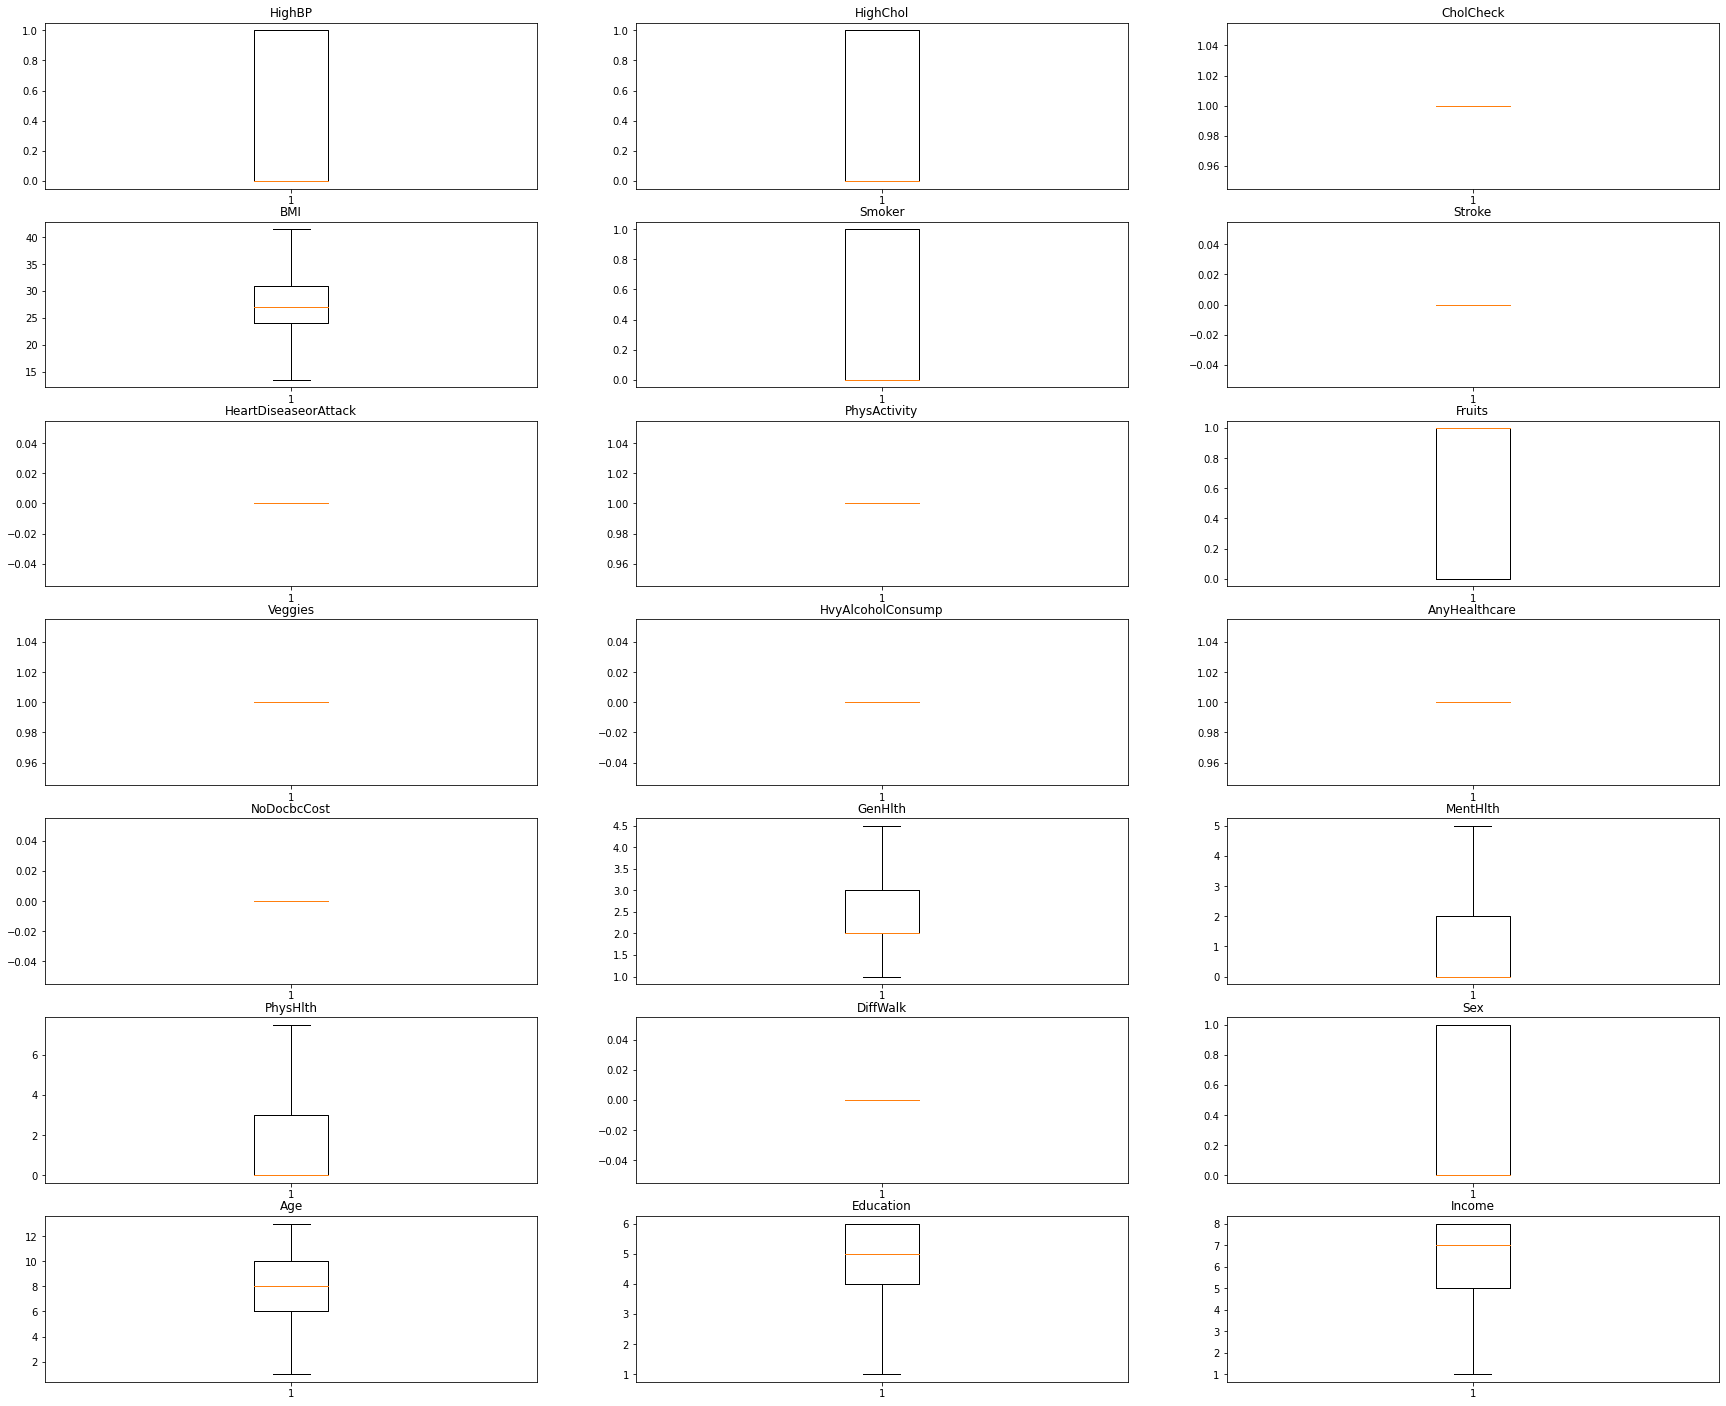

In [44]:
fig, axs = plt.subplots(7, 3, sharex=False, sharey=False, figsize=(30, 25))

counter = 0
for num_column in numerical:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].boxplot(X_train[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [45]:
X_train[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,202936.0,0.428835,0.494911,0.0,0.0,0.0,1.0,1.0
HighChol,202936.0,0.424671,0.494294,0.0,0.0,0.0,1.0,1.0
CholCheck,202936.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
BMI,202936.0,28.115361,5.560933,13.5,24.0,27.0,31.0,41.5
Smoker,202936.0,0.442898,0.496730,0.0,0.0,0.0,1.0,1.0
Stroke,202936.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,202936.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PhysActivity,202936.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Fruits,202936.0,0.634629,0.481535,0.0,0.0,1.0,1.0,1.0
Veggies,202936.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Terlihat outlier sudah terhandling, selanjutnya kita cek missing value.

---
## Handling Missing Value

Mencari missing value pada kolom numerical di X_train, X_test, data_inf.

In [46]:
#X_train
X_train.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [47]:
#X_test
X_test.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [48]:
#data_inf
data_inf.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Tidak ada missing value pada X_train, X_test, dan data_inf. Selanjutnya lakukan feature selection.

---
## Feature Selection

Dikutip dari DataTechNotes.com, SelectKBest digunakan karena dataset yang digunakan cukup besar dan mempermudah untuk mencari fitur mana yang kurang relevan dan mengurangi waktu training.

source: https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html#:~:text=The%20SelectKBest%20method%20selects%20the,a%20large%20dataset%20for%20training.

Pemilihan fitur dilakukan pada X_train.

In [49]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
196912,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
73266,1.0,1.0,1.0,35.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,5.0
63183,1.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,7.5,0.0,0.0,10.0,5.0,4.0
91927,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,5.0
317,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107949,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,3.0,7.0
175366,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0,4.0,4.0
34708,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,5.0,8.0
160968,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,2.0,0.0,0.0,12.0,5.0,5.0


Lakukan standarisasi dengan MinMaxScaler karena ada beberapa data yang skew.

In [50]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_num_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_train_num_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
196912,0.0,0.0,0.0,0.482143,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.500000,1.0,1.000000
73266,1.0,1.0,0.0,0.767857,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.666667,0.8,0.571429
63183,1.0,1.0,0.0,0.660714,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.571429,0.0,1.0,0.0,0.0,0.750000,0.8,0.428571
91927,0.0,0.0,0.0,0.375000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.250000,0.6,0.571429
317,1.0,1.0,0.0,0.446429,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.571429,0.0,0.0,0.0,1.0,1.000000,0.8,0.428571


Setelah dilakukan scaling kita bisa pilih kolom mana saja yang bisa digunakan untuk menjadi feature terbaik. Akan dipilih 10 feature terbaik dari semua kolom yang ada.

In [51]:
X_select = X_train_num_scaled
y_select = y_train
selector = SelectKBest(chi2, k=10)
selector.fit(X_select, y_select)
X_train_new = selector.transform(X_select)
print(X_select.columns[selector.get_support(indices=True)])

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth', 'MentHlth',
       'PhysHlth', 'Age', 'Education', 'Income'],
      dtype='object')


Jadi, fitur yang akan dipakai adalah ['HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']. Selanjutnya, atur kolom X_train, X_test, dan data_inf untuk memegang 10 kolom ini saja.

In [52]:
X_train = X_train[['HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth', 'MentHlth',
                   'PhysHlth', 'Age', 'Education', 'Income']]
X_test = X_test[['HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth', 'MentHlth',
                   'PhysHlth', 'Age', 'Education', 'Income']]
data_inf = data_inf[['HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth', 'MentHlth',
                   'PhysHlth', 'Age', 'Education', 'Income','Diabetes_binary']]

---
## SMOTE

Buat SMOTE agar data menjadi balance

In [53]:
smt = SMOTE(random_state=17)

In [54]:
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)
y_train_balanced.value_counts()

0.0    174660
1.0    174660
Name: Diabetes_binary, dtype: int64

# 6 - Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Ada empat algoritma yang akan dipakai pada Milestone 2 ini, yaitu Logistic Regression, Decission Tree, Random Forest, dan KNeighbor.

Buat preprocessing untuk untuk kolom numerik.

In [55]:
numerical_cols = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth', 'MentHlth',
                   'PhysHlth', 'Age', 'Education', 'Income']

In [56]:
preprocessor = ColumnTransformer(transformers=[('num', MinMaxScaler(), numerical_cols)])

Definisikan model yang akan dipakai.

In [57]:
model_log_reg = LogisticRegression(random_state=17)
model_dec_tree = DecisionTreeClassifier(random_state=17)
model_rand_for = RandomForestClassifier(random_state=17)
model_knn = KNeighborsClassifier()

# 7 - Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

Step dalam pipeline ini adalah **Preprocessing** lalu **model** yang akan digunakan.

---
## Logistic Regression Pipeline

In [58]:
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model_log_reg)])

Lakukan hyperparameter tuning untuk mencari parameter terbaik untuk model.

In [59]:
param_logreg = {
        'model__C': [0.3, 0.7, 1]}

In [60]:
# grid_logreg = GridSearchCV(logreg_pipeline, param_logreg, refit = True, verbose = 3)
# grid_logreg.fit(X_train, y_train)
# print(grid_logreg.best_estimator_) 

Dapat terlihat bahwa nilai C yang optimal adalah 1, maka kita akan buat model baru dengan parameter terbaik.

In [61]:
model_log_reg_opt = LogisticRegression(C=1, random_state=17)

In [62]:
logreg_pipeline_opt = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', model_log_reg_opt)])

In [63]:
logreg_pipeline_opt.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['HighBP', 'HighChol', 'BMI',
                                                   'Smoker', 'GenHlth',
                                                   'MentHlth', 'PhysHlth',
                                                   'Age', 'Education',
                                                   'Income'])])),
                ('model', LogisticRegression(C=1, random_state=17))])

---
## Decission Tree Pipeline

In [64]:
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('smote', smt),
                              ('model', model_dec_tree)])

Lakukan hyperparameter tuning untuk mencari parameter terbaik untuk model.

In [65]:
param_dt = {
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_leaf': [1, 2, 3]}

In [66]:
# grid_dt = GridSearchCV(dt_pipeline, param_dt, refit = True, verbose = 3)
# grid_dt.fit(X_train, y_train)
# print(grid_dt.best_estimator_) 

Dapat terlihat bahwa nilai min_sample_leaf yang optimal adalah 2, sedangkan model_criterion akan menggunakan default yaitu 'gini'. Maka, kita akan buat model baru dengan parameter terbaik.

In [67]:
model_dec_tree_opt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, random_state=17)

In [68]:
dt_pipeline_opt = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model_dec_tree_opt)])

In [69]:
dt_pipeline_opt.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['HighBP', 'HighChol', 'BMI',
                                                   'Smoker', 'GenHlth',
                                                   'MentHlth', 'PhysHlth',
                                                   'Age', 'Education',
                                                   'Income'])])),
                ('model',
                 DecisionTreeClassifier(min_samples_leaf=2, random_state=17))])

---
## Random Forest Pipeline

In [70]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rand_for)])

Lakukan hyperparameter tuning untuk mencari parameter terbaik untuk model.

In [71]:
params_rf = {
    'model__n_estimators': [20, 100, 120],
    'model__min_samples_leaf': [5, 8, 10]}

In [72]:
# grid_rf = GridSearchCV(rf_pipeline, params_rf, refit = True, verbose = 3)
# grid_rf.fit(X_train, y_train)
# print(grid_rf.best_estimator_) 

Dapat terlihat bahwa nilai min_sample_leaf yang optimal adalah 5, sedangkan n_estimatornya akan menggunakan default yaitu 100. Maka, kita akan buat model baru dengan parameter terbaik.

In [73]:
model_rand_for_opt = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, random_state=17)

In [74]:
rf_pipeline_opt = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model_rand_for_opt)])

In [75]:
rf_pipeline_opt.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['HighBP', 'HighChol', 'BMI',
                                                   'Smoker', 'GenHlth',
                                                   'MentHlth', 'PhysHlth',
                                                   'Age', 'Education',
                                                   'Income'])])),
                ('model',
                 RandomForestClassifier(min_samples_leaf=5, random_state=17))])

---
## KNN Pipeline

In [76]:
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model_knn)])

Lakukan hyperparameter tuning untuk mencari parameter terbaik untuk model.

In [77]:
param_knn = {
    'model__n_neighbors': [3, 5, 7],
    'model__leaf_size': [15, 30, 45]}

In [78]:
# grid_knn = GridSearchCV(knn_pipeline, param_knn, refit = True, verbose = 3)
# grid_knn.fit(X_train, y_train)
# print(grid_knn.best_estimator_) 

Dapat terlihat bahwa nilai n_neighbors yang optimal adalah 3, sedangkan model_leaf_sizenya akan menggunakan default yaitu 30. Maka, kita akan buat model baru dengan parameter terbaik.

In [79]:
model_knn_opt = KNeighborsClassifier(n_neighbors=3, leaf_size=30)

In [80]:
knn_pipeline_opt = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model_knn_opt)])

In [81]:
knn_pipeline_opt.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['HighBP', 'HighChol', 'BMI',
                                                   'Smoker', 'GenHlth',
                                                   'MentHlth', 'PhysHlth',
                                                   'Age', 'Education',
                                                   'Income'])])),
                ('model', KNeighborsClassifier(n_neighbors=3))])

# 8 - Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

---
## Logistic Regression

In [82]:
y_pred_logreg = logreg_pipeline_opt.predict(X_test)

In [83]:
rocscore_logreg = rocauc(y_test, y_pred_logreg)

In [84]:
print(f'Overall Accuracy: {100*logreg_pipeline_opt.score(X_test, y_test)}%')
print(f'ROC AUC Score: {100*rocscore_logreg}%')
print(classification_report(y_test, y_pred_logreg))

Overall Accuracy: 74.48259549808807%
ROC AUC Score: 73.3078052483497%
              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83     43665
         1.0       0.32      0.72      0.44      7069

    accuracy                           0.74     50734
   macro avg       0.63      0.73      0.64     50734
weighted avg       0.86      0.74      0.78     50734



Pada kasus ini kita akan menggunakan recall karena kita akan melakukan deteksi terhadap adanya penyakit diabetes.

Pada model logreg weighted average recall bernilai 0.74 atau 74%. Nilai tersebut dinilai kurang sehingga kita bandingkan dengan model lainnya.

---
## Decission Tree

In [85]:
y_pred_dt = dt_pipeline_opt.predict(X_test)

In [86]:
rocscore_dt = rocauc(y_test, y_pred_dt)

In [87]:
print(f'Overall Accuracy: {100*dt_pipeline_opt.score(X_test, y_test)}%')
print(f'ROC AUC Score: {100*rocscore_dt}%')
print(classification_report(y_test, y_pred_dt))

Overall Accuracy: 82.60732447668231%
ROC AUC Score: 58.12142620538576%
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     43665
         1.0       0.33      0.24      0.28      7069

    accuracy                           0.83     50734
   macro avg       0.61      0.58      0.59     50734
weighted avg       0.81      0.83      0.81     50734



Model decission tree memiliki nilai recall yang tinggi untuk 0 (tidak diabetes) namun rendah untuk 1 (diabetes). Hal ini menunjukkan bahwa model kurang bisa untuk mendeteksi adanya diabetes dari data yang diberikan.

Akan tetapi, model memilliki weighted average yang cukup tinggi yaitu 82% sehingga bisa dijadikan pertimbangan.

---
## Random Forest

In [88]:
y_pred_rf = rf_pipeline_opt.predict(X_test)

In [89]:
rocscore_rf = rocauc(y_test, y_pred_rf)

In [90]:
print(f'Overall Accuracy: {100*rf_pipeline_opt.score(X_test, y_test)}%')
print(f'ROC AUC Score: {100*rocscore_rf}%')
print(classification_report(y_test, y_pred_rf))

Overall Accuracy: 84.37536957464422%
ROC AUC Score: 63.46418821640613%
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91     43665
         1.0       0.43      0.34      0.38      7069

    accuracy                           0.84     50734
   macro avg       0.66      0.63      0.65     50734
weighted avg       0.83      0.84      0.84     50734



Hal yang sama juga terjadi pada model Random Forest di mana model kurang bisa melakukan prediksi terhadap adanya indikasi diabetes.

Di sisi lain, model ini memiliki weighted average yang cukup tinggi yaitu 84% sehingga bisa menjadi pertimbangan.

---
## KNN

In [91]:
y_pred_knn = knn_pipeline_opt.predict(X_test)

In [92]:
rocscore_knn = rocauc(y_test, y_pred_knn)

In [93]:
print(f'Overall Accuracy: {100*knn_pipeline_opt.score(X_test, y_test)}%')
print(f'ROC AUC Score: {100*rocscore_knn}%')
print(classification_report(y_test, y_pred_knn))

Overall Accuracy: 79.01210233768282%
ROC AUC Score: 63.2946634535692%
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87     43665
         1.0       0.31      0.42      0.36      7069

    accuracy                           0.79     50734
   macro avg       0.61      0.63      0.61     50734
weighted avg       0.82      0.79      0.80     50734



Model KNN tidak dirasa kurang baik untuk nilai recall dan rata-ratanya sehingga kemungkinan tidak akan dipakai.

---
## Kesimpulan

Menurut pengamatan penulis, beberapa model memiliki kemampuan yang bagus untuk melakukan deteksi untuk non diabetes namun kurang bagus untuk mendeteksi diabetes.

Dengan melihat skor recall dan skor ROC AUC, maka model yang terbaik untuk saat ini adalah Logistic Regression dengan skor recall sebesar 74% dan ROC AUC sebesar 73.8%.

# 9 - Model saving

Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

Model terbaik yang akan digunakan adalah Logistic Regression dengan model:

In [98]:
numerical_cols = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth', 'MentHlth',
                   'PhysHlth', 'Age', 'Education', 'Income']

preprocessor = ColumnTransformer(transformers=[('num', MinMaxScaler(), numerical_cols)])

model_log_reg_opt = LogisticRegression(C=1, random_state=17)

logreg_pipeline_opt = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', model_log_reg_opt)])

In [99]:
final_pipeline = make_pipeline(logreg_pipeline_opt)

In [108]:
with open("pipeline.pkl", "wb") as pipe_file:
    pickle.dump(final_pipeline, pipe_file)

# 9 - Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [96]:
data_inf

,HighBP,HighChol,BMI,Smoker,GenHlth,MentHlth,PhysHlth,Age,Education,Income,Diabetes_binary
0,1.0,1.0,37.0,0.0,3.0,0.0,0.0,5.0,5.0,7.0,0.0
1,0.0,0.0,26.0,0.0,2.0,0.0,0.0,6.0,4.0,6.0,0.0
2,1.0,1.0,30.0,1.0,2.0,0.0,30.0,10.0,6.0,5.0,0.0
3,1.0,0.0,27.0,0.0,3.0,0.0,0.0,5.0,4.0,6.0,0.0
4,0.0,0.0,22.0,0.0,2.0,30.0,0.0,9.0,6.0,8.0,0.0
5,0.0,1.0,19.0,1.0,1.0,0.0,0.0,13.0,6.0,8.0,0.0
6,1.0,0.0,33.0,1.0,3.0,0.0,0.0,11.0,5.0,8.0,1.0
7,0.0,1.0,35.0,0.0,2.0,14.0,30.0,10.0,4.0,8.0,0.0
8,0.0,0.0,30.0,0.0,1.0,15.0,0.0,7.0,4.0,7.0,0.0
9,1.0,1.0,23.0,1.0,3.0,2.0,7.0,8.0,5.0,2.0,0.0


In [101]:
X_inf = data_inf.drop('Diabetes_binary', axis=1)
y_inf = data_inf['Diabetes_binary']
X_inf

,HighBP,HighChol,BMI,Smoker,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,1.0,1.0,37.0,0.0,3.0,0.0,0.0,5.0,5.0,7.0
1,0.0,0.0,26.0,0.0,2.0,0.0,0.0,6.0,4.0,6.0
2,1.0,1.0,30.0,1.0,2.0,0.0,30.0,10.0,6.0,5.0
3,1.0,0.0,27.0,0.0,3.0,0.0,0.0,5.0,4.0,6.0
4,0.0,0.0,22.0,0.0,2.0,30.0,0.0,9.0,6.0,8.0
5,0.0,1.0,19.0,1.0,1.0,0.0,0.0,13.0,6.0,8.0
6,1.0,0.0,33.0,1.0,3.0,0.0,0.0,11.0,5.0,8.0
7,0.0,1.0,35.0,0.0,2.0,14.0,30.0,10.0,4.0,8.0
8,0.0,0.0,30.0,0.0,1.0,15.0,0.0,7.0,4.0,7.0
9,1.0,1.0,23.0,1.0,3.0,2.0,7.0,8.0,5.0,2.0


In [103]:
final_pipeline.fit(X_inf, y_inf)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   ['HighBP',
                                                                    'HighChol',
                                                                    'BMI',
                                                                    'Smoker',
                                                                    'GenHlth',
                                                                    'MentHlth',
                                                                    'PhysHlth',
                                                                    'Age',
                                                                    'Education',
                                                          

In [105]:
y_pred_inf = final_pipeline.predict(X_inf)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['y-Prediction'])
y_pred_inf_df

,y-Prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [106]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,HighBP,HighChol,BMI,Smoker,GenHlth,MentHlth,PhysHlth,Age,Education,Income,Diabetes_binary,y-Prediction
0,1.0,1.0,37.0,0.0,3.0,0.0,0.0,5.0,5.0,7.0,0.0,0.0
1,0.0,0.0,26.0,0.0,2.0,0.0,0.0,6.0,4.0,6.0,0.0,0.0
2,1.0,1.0,30.0,1.0,2.0,0.0,30.0,10.0,6.0,5.0,0.0,0.0
3,1.0,0.0,27.0,0.0,3.0,0.0,0.0,5.0,4.0,6.0,0.0,0.0
4,0.0,0.0,22.0,0.0,2.0,30.0,0.0,9.0,6.0,8.0,0.0,0.0
5,0.0,1.0,19.0,1.0,1.0,0.0,0.0,13.0,6.0,8.0,0.0,0.0
6,1.0,0.0,33.0,1.0,3.0,0.0,0.0,11.0,5.0,8.0,1.0,0.0
7,0.0,1.0,35.0,0.0,2.0,14.0,30.0,10.0,4.0,8.0,0.0,0.0
8,0.0,0.0,30.0,0.0,1.0,15.0,0.0,7.0,4.0,7.0,0.0,0.0
9,1.0,1.0,23.0,1.0,3.0,2.0,7.0,8.0,5.0,2.0,0.0,0.0


Terlihat ada satu yang memiliki prediksi salah yaitu pada index ke-6. Hal ini terjadi karena Logistic Regression hanya mampu mendeteksi sebesar 73% saja, sehingga ada kemungkinan untuk terjadinya salah prediksi.

Namun, pada data inference ini hanya terjadi satu kesalahan prediksi sehingga model dirasa sudah cukup baik.

Untuk kedepannya, bisa diubah penggunaan scaler, hyperparameter, dan penggunaan semua feature untuk melihat apakah ada perubahan.

# 10 - Kesimpulan

- Dataset yang digunakan adalah diabetes_binary_health.csv yang berisi tentang resiko perilaku yang berhubungan dengan kesehatan, kondisi jantung kronis, dan penggunaan layanan yang digunakan untuk mencegah diabetes.

- Dataset tidak memiliki missing value.

- Target kolom adalah 'Diabetes_binary'.

- Menggunakan capping/winsorizer untuk melakukan handling outlier. Hal ini dilakukan karena penulis ingin mempertahankan observasi namun tidak diambil secara literal.

- Pemilihan feature menggunakan SelectKBest dan diambil 10 feature terbaik.

- Feature tersebut adalah ['HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

- Ada empat algoritma yang akan dipakai pada Milestone 2 ini, yaitu Logistic Regression, Decission Tree, Random Forest, dan KNeighbor.

- Melakukan omitting pada pencarian fitur terbaik karena memakan waktu terlalu banyak.

- Model terbaik adalah Logistic Regression karena memiliki score Recall untuk nilai 0 dan 1 yang seimbang, sedangkan model lain memiliki score Recall yang tidak seimbang.

- Terlihat ada satu yang memiliki prediksi salah yaitu pada index ke-6. Hal ini terjadi karena Logistic Regression hanya mampu mendeteksi sebesar 73% saja, sehingga ada kemungkinan untuk terjadinya salah prediksi.

- Untuk kedepannya, bisa diubah penggunaan scaler, hyperparameter, dan penggunaan semua feature untuk melihat apakah ada perubahan.